<a href="https://colab.research.google.com/github/Mehdys/Vasicek-irrbb-modelling/blob/main/Notebooks/PortfeuilleSimplifie%CC%81_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

file_path = '/content/IRR.xlsx'

# Chargement du fichier Excel
df_irr = pd.read_excel(file_path)

# Affichage des premières lignes
df_irr.head()


,date,value
0,1970-01-01,10.35
1,1970-02-01,9.86
2,1970-03-01,9.55
3,1970-04-01,8.95
4,1970-05-01,9.02


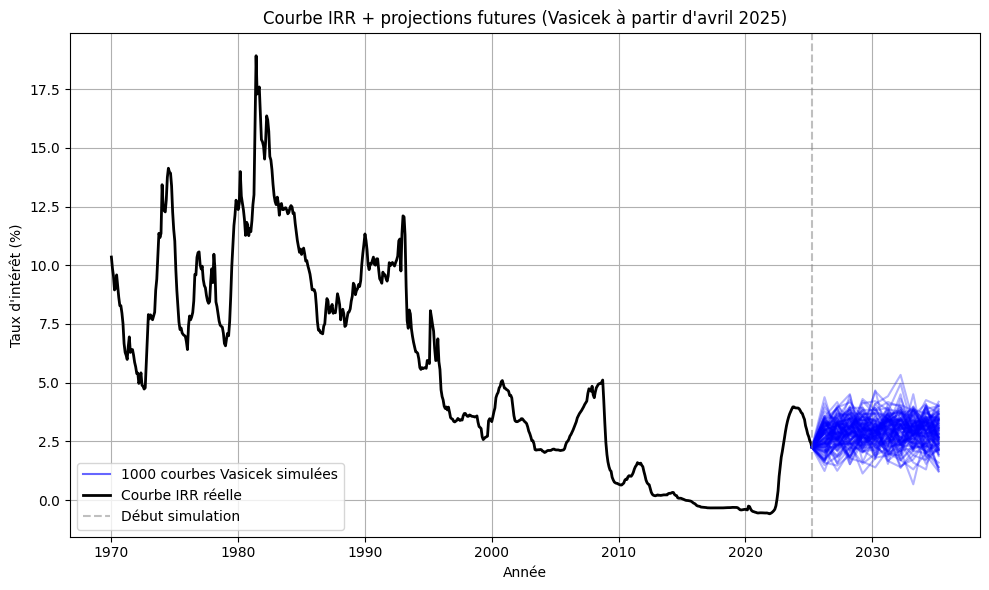

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Charger et préparer les données IRR ---
df_irr['date'] = pd.to_datetime(df_irr['date'], errors='coerce')
df_irr = df_irr.dropna(subset=['date', 'value']).sort_values('date')

# Axe temporel : années réelles (ex: 1970.0, 2025.3)
df_irr['annees'] = df_irr['date'].dt.year + df_irr['date'].dt.dayofyear / 365.25

# Extraction des colonnes utiles
t_irr = df_irr['annees'].values
r_irr = df_irr['value'].values / 100  # en décimal

# --- 2. Paramètres du modèle Vasicek ---
a = 1.2114
b = 0.0294
sigma = 0.01
dt = 0.004
T = 10  # en années
steps = int(T / dt)
n_simulations = 100

# Taux initial à avril 2025 (valeur fixée)
r0 = 2.248181818 / 100

# --- 3. Simulation Vasicek ---
np.random.seed(42)
rates = np.zeros((n_simulations, steps + 1))
rates[:, 0] = r0
for t in range(1, steps + 1):
    z = np.random.normal(0, 1, n_simulations)
    rates[:, t] = rates[:, t - 1] + a * (b - rates[:, t - 1]) * dt + sigma * np.sqrt(dt) * z

# Extraction annuelle des courbes simulées
yearly_indices = np.arange(0, steps + 1, int(1 / dt))
rates_yearly = rates[:, yearly_indices[:11]]

# Axe temporel pour les projections : à partir de la dernière année réelle
t_start_proj = df_irr['annees'].iloc[-1]
t_futurs = np.arange(t_start_proj, t_start_proj + 11)

# --- 4. Tracé final ---
plt.figure(figsize=(10, 6))

plt.plot([], [], color='blue', alpha=0.6, label='1000 courbes Vasicek simulées')

# Courbe historique IRR
plt.plot(t_irr, r_irr * 100, color="black", label="Courbe IRR réelle", linewidth=2)

nb_to_plot = 100
n_plotted = 0
i = 0

while n_plotted < nb_to_plot and i < len(rates_yearly):
    curve = rates_yearly[i] * 100  # conversion en %

    # Filtre visuel : on ne garde que les courbes cohérentes
    plt.plot(t_futurs, curve, alpha=0.3, color="blue")
    n_plotted += 1

    i += 1


plt.axvline(x=t_start_proj, linestyle="--", color="gray", alpha=0.5, label="Début simulation")
plt.title("Courbe IRR + projections futures (Vasicek à partir d'avril 2025)")
plt.xlabel("Année")
plt.ylabel("Taux d'intérêt (%)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd

# Étape 1 : Filtrage des courbes réalistes entre -1% et 8%
filtered_rates = []
for i in range(rates_yearly.shape[0]):
    curve_percent = rates_yearly[i] * 100
    if (curve_percent >= -1).all() and (curve_percent <= 8).all():
        filtered_rates.append(rates_yearly[i])

# Conversion en array numpy
filtered_rates = np.array(filtered_rates)

# Étape 2 : Création du DataFrame (arrondi à 2 décimales)
df_simulations = pd.DataFrame(
    np.round(filtered_rates * 100, 2),
    columns=[f"Année {i}" for i in range(filtered_rates.shape[1])] # Fix: Use shape[1] for number of columns
)
df_simulations.index.name = "Simulation n°"

# Étape 3 : Affichage du nombre de courbes retenues
nb_retained = df_simulations.shape[0]
print(f"Nombre de trajectoires simulées retenues : {nb_retained} sur 1000")

display(df_simulations)

Nombre de trajectoires simulées retenues : 100 sur 1000


,Année 0,Année 1,Année 2,Année 3,Année 4,Année 5,Année 6,Année 7,Année 8,Année 9,Année 10
Simulation n°,,,,,,,,,,,
0,2.25,3.11,3.48,3.85,3.00,2.94,3.17,3.41,2.76,3.51,2.69
1,2.25,1.62,3.25,2.43,2.05,2.94,2.05,3.23,3.68,1.74,2.16
2,2.25,3.22,3.34,3.46,2.06,2.34,2.44,3.60,2.10,1.99,2.44
3,2.25,3.32,2.80,3.48,3.25,2.42,3.05,2.98,2.17,3.40,2.15
4,2.25,3.02,2.79,1.53,2.76,2.86,3.56,3.83,3.11,3.78,3.22
...,...,...,...,...,...,...,...,...,...,...,...
95,2.25,2.00,2.49,2.15,2.84,2.95,3.37,1.70,2.35,3.72,3.44
96,2.25,3.94,3.22,2.72,2.67,2.26,3.00,3.94,3.13,2.41,3.86
97,2.25,4.12,3.04,1.78,1.62,2.73,2.30,3.09,2.92,3.55,1.94


In [ ]:
df_simulations.to_excel("Simulations_filtrees_gradual_diffusion.xlsx")

In [ ]:
import numpy as np
import pandas as pd

# Vérifier les dimensions de df_simulations
print("Dimensions de df_simulations :", df_simulations.shape)
# Conversion des taux de % vers décimal
df_simulations_decimal = df_simulations / 100

# --- Paramètres du portefeuille ---
n_years = df_simulations_decimal.shape[1]
flux_actif = np.full(n_years, 300_000)
années = np.arange(1, n_years + 1)

# --- Calcul de l’EVE pour chaque simulation ---
eve_stochastique = []

for i in range(df_simulations_decimal.shape[0]):
    taux_simules = df_simulations_decimal.iloc[i].values
    actualisateurs = 1 / (1 + taux_simules) ** années
    flux_passif = 10_000_000 * taux_simules
    va_actif = np.sum(flux_actif * actualisateurs)
    va_passif = np.sum(flux_passif * actualisateurs)
    eve = va_actif - va_passif
    eve_stochastique.append(eve)

# Résultats dans un DataFrame
df_eve_stoch = pd.DataFrame({'EVE': eve_stochastique})

# Statistiques descriptives
print(df_eve_stoch.describe(percentiles=[.01, .05, .25, .5, .75, .95, .99]))

print(df_simulations_decimal.iloc[1].values)

Dimensions de df_simulations : (100, 11)
                 EVE
count     100.000000
mean   169620.681363
std    228617.080029
min   -439413.685339
1%    -267024.327076
5%    -171316.533803
25%    -19495.915034
50%    160419.565211
75%    329195.689342
95%    548509.127427
99%    673028.397551
max    725896.636726
[0.0225 0.0162 0.0325 0.0243 0.0205 0.0294 0.0205 0.0323 0.0368 0.0174
 0.0216]


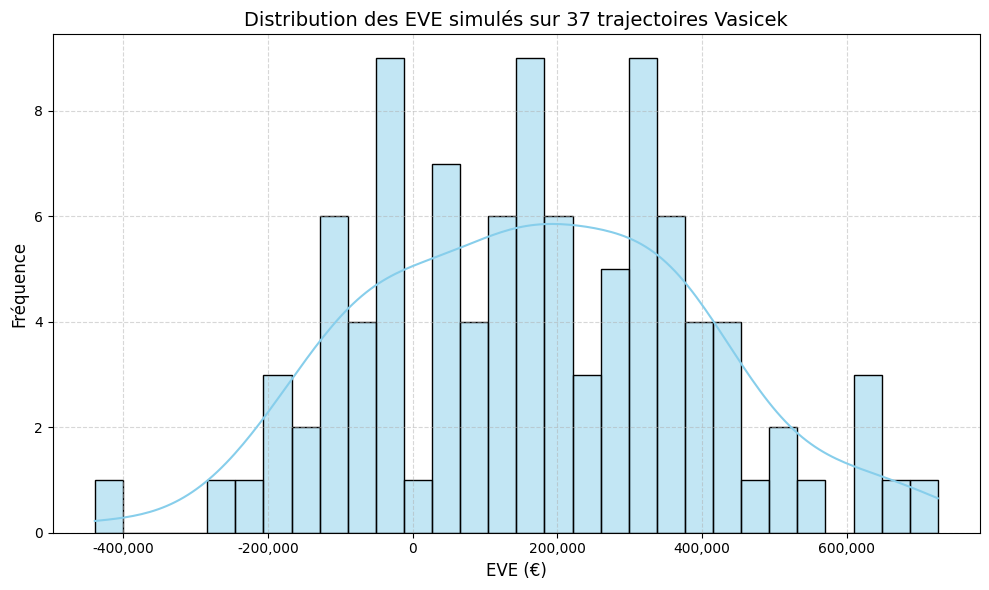

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Tracé de la distribution de l'EVE simulée
plt.figure(figsize=(10, 6))
sns.histplot(df_eve_stoch['EVE'], bins=30, kde=True, color="skyblue")

# Personnalisation du graphique
plt.title("Distribution des EVE simulés sur 37 trajectoires Vasicek", fontsize=14)
plt.xlabel("EVE (€)", fontsize=12)
plt.ylabel("Fréquence", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.tight_layout()

# Affichage
plt.show()


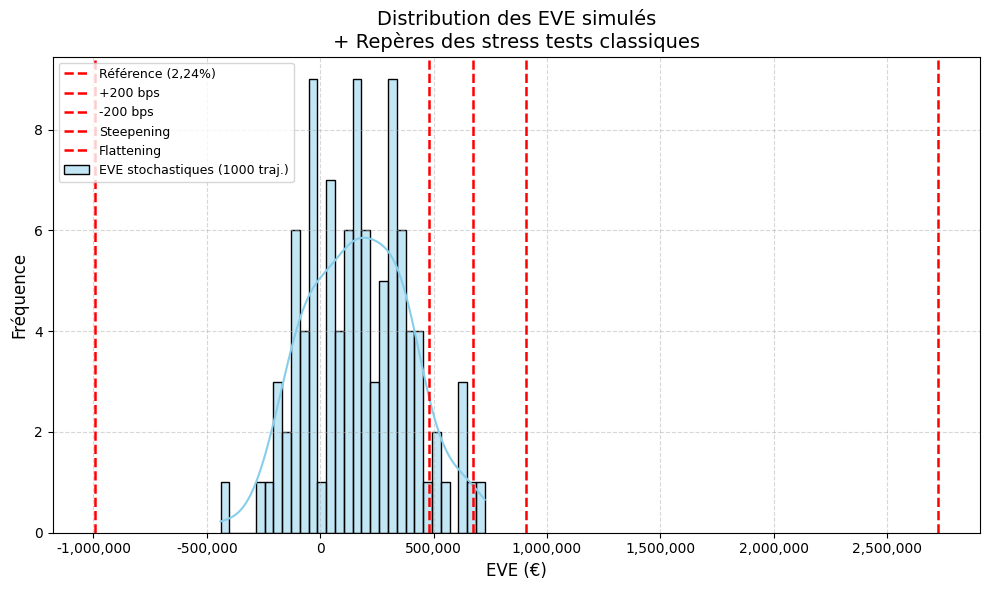

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Résultats des stress tests réglementaires (EVE en €)
stress_tests = {
    "Référence (2,24%)": 674_183,
    "+200 bps": -993_842,
    "-200 bps": 2_723_915,
    "Steepening": 481_037,
    "Flattening": 905_601
}

# Tracé de la distribution des EVE simulés
plt.figure(figsize=(10, 6))
sns.histplot(df_eve_stoch['EVE'], bins=30, kde=True, color="skyblue", label="EVE stochastiques (1000 traj.)")

# Ajout des lignes rouges pour les stress tests classiques
for label, value in stress_tests.items():
    plt.axvline(x=value, color="red", linestyle="--", linewidth=1.8, label=label)

# Mise en forme
plt.title("Distribution des EVE simulés\n+ Repères des stress tests classiques", fontsize=14)
plt.xlabel("EVE (€)", fontsize=12)
plt.ylabel("Fréquence", fontsize=12)
plt.legend(loc="upper left", fontsize=9)
plt.grid(True, linestyle="--", alpha=0.5)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.tight_layout()
plt.show()
